---
# PHY426 Practical 8: Random Processes
---

This practical includes problems from Chapter 10 of Newman's book. 

This assignment will be due at 1:10pm on Thursday March 14th (just before the next practical).

Your solution to each question will be graded for correctness as well as for the readability of your code (including comments, appropriate labels on figures, etc). 20% of the grade will be based on comments/readability/graph labels. 

You can complete this assignment with a partner or individually. If you work with a partner, please provide their name here in the cell below:

Partner: Mohamed Salama, utorid: salamam5

In [7]:
# Make sure to run this so you can see your plots in the notebook
%matplotlib inline

---
# Exercise 1: Brownian Motion
---


Brownian motion is the motion of a particle, such as a smoke or
dust particle, in a gas, as it is buffeted by random collisions with gas
molecules.  Make a simple computer simulation of such a particle in two
dimensions as follows.  

The particle is confined to a square grid or
lattice $L\times L$ squares on a side, so that its position can be
represented by two integers $i,j = 0\ldots L-1$.  It starts in the middle
of the grid.  On each step of the simulation, choose a random
direction---up, down, left, or right---and move the particle one step in
that direction.  This process is called a random walk.  The particle is not
allowed to move outside the limits of the lattice---if it tries to do so,
choose a new random direction to move in.

Write a program to perform a million steps of this process on a lattice
with $L=101$ and make a visualization (or an animation) of the position of the
particle.  (We choose an odd length for the side of the square so that
there is one lattice site exactly in the center.)


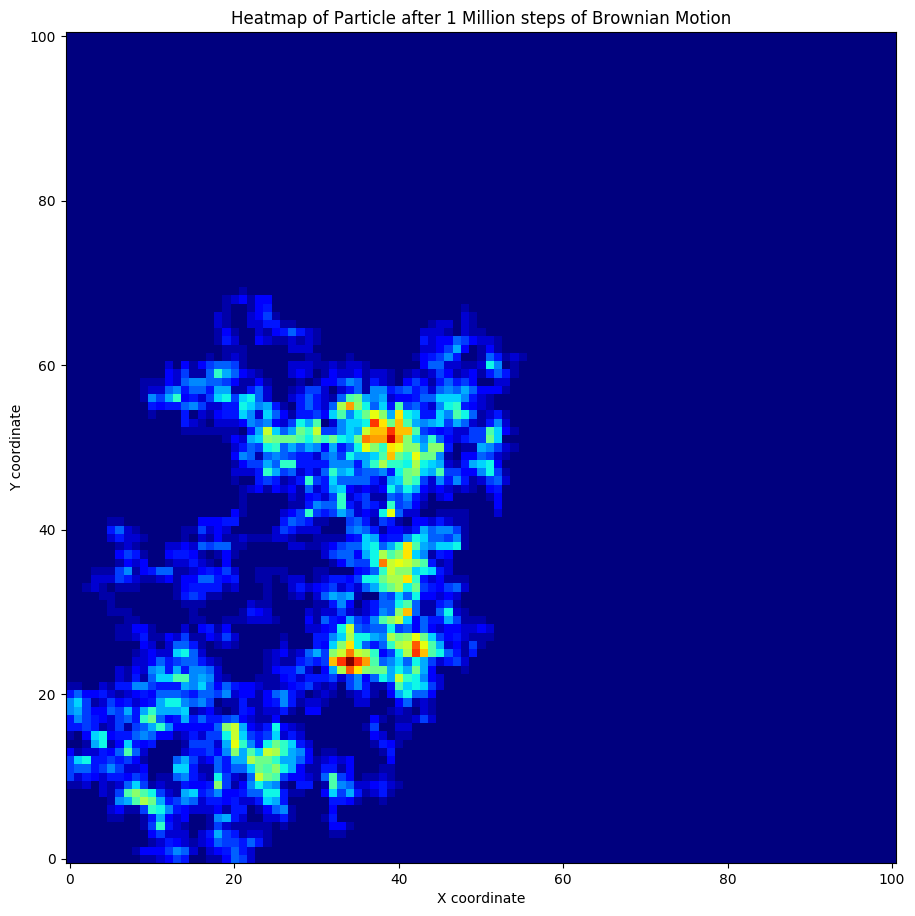

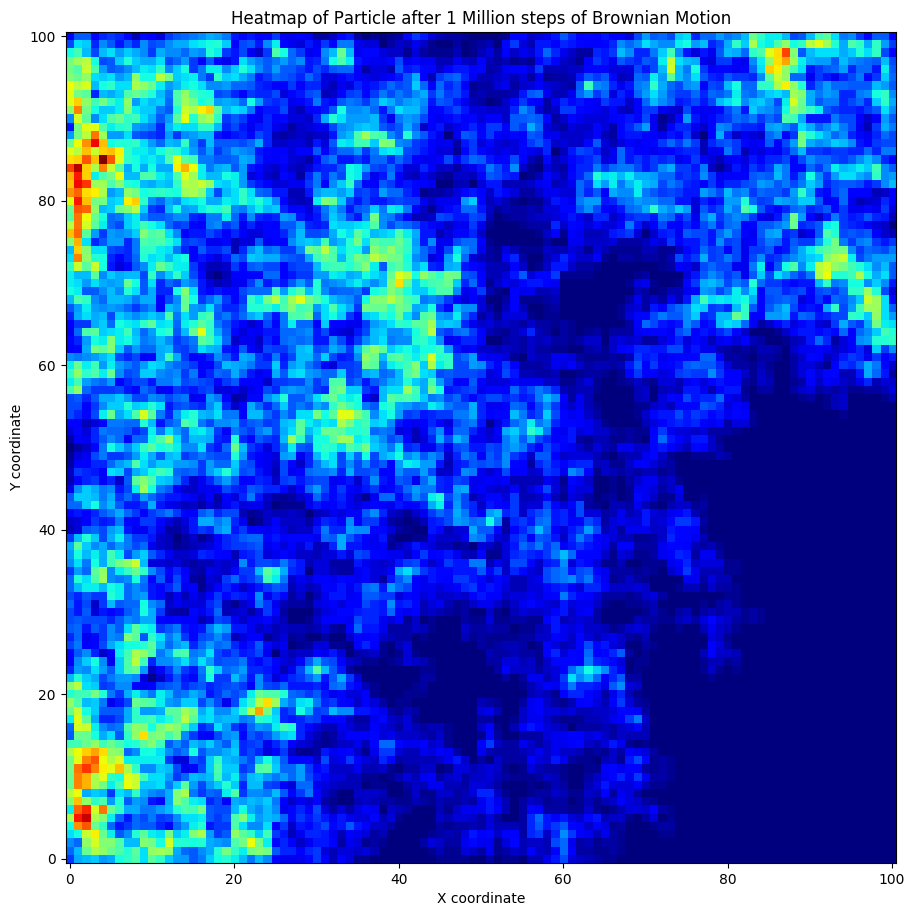

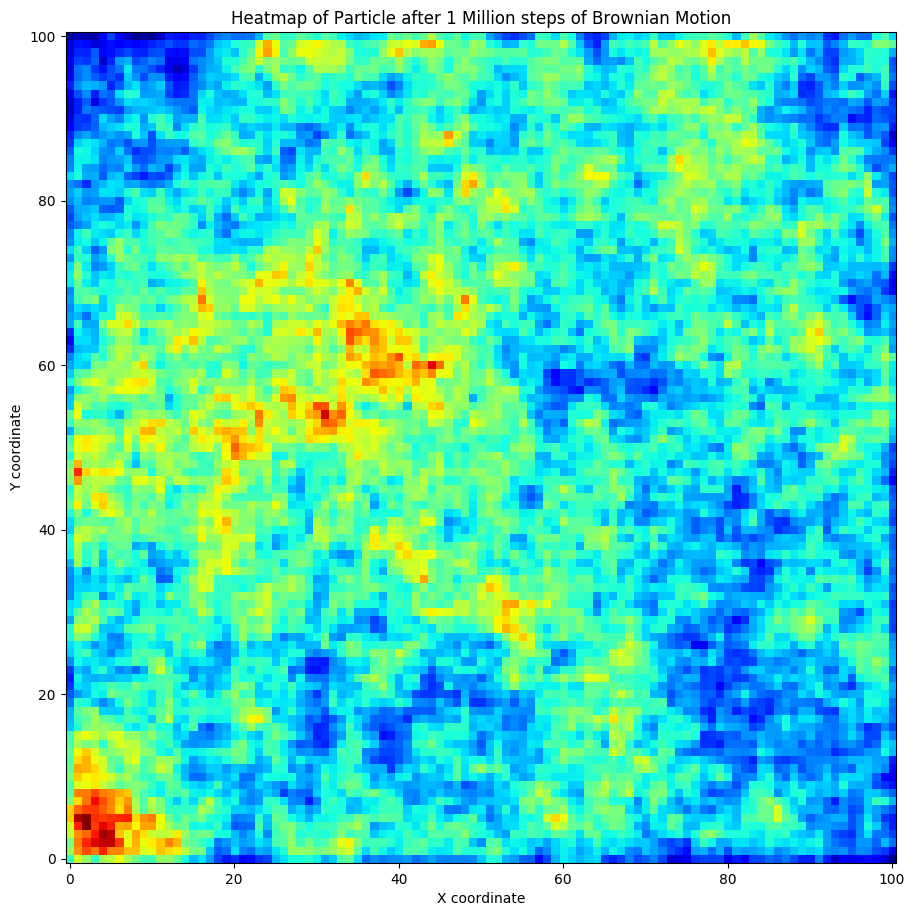

Animating...


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation



# Set up grid for simulation
L = 101
mid = L//2 + 1



def simulate(N):
    """
    Simulate N steps of brownian motion
    """
    # Starting location of particle: (x,y)
    loc = np.array([mid, mid])
    pos = [loc]  # array to keep track of all positions particle reaches
    
    # Grid to represent heat map:
    grid = np.zeros((L,L))
    grid[mid][mid]=1

    # update the particle's location N times (ie. run the simulation)
    for i in range(N):
        out_of_range = True
        while out_of_range:

            r = np.random.randint(4)

            #Choosing a random direction out of 4 possibilities:
            if r == 0:
                loc2 = loc + np.array([1,0])
            elif r == 1:
                loc2 = loc + np.array([-1,0])
            elif r == 2:
                loc2 = loc + np.array([0,1])
            else:
                loc2 = loc + np.array([0,-1])

            if loc2[0] >= 0 and loc2[0] < 101 and loc2[1] >= 0 and loc2[1] < 101:
                out_of_range = False
                grid[loc2[0]][loc2[1]] += 1
            else:
                loc2 = loc

        loc = loc2
        pos += [loc]
        
    pos = np.array(pos)
    return pos, grid



# Simulate 10 thousand steps:
heatmap = simulate(10000)[1]
# Setup the figure and axes...
fig, ax = plt.subplots(figsize=(11,11), dpi=100)

#plot the x and y positions vs time
plt.imshow(heatmap, cmap='jet', origin='lower')
plt.title("Heatmap of Particle after 1 Million steps of Brownian Motion")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.show()


# Simulate 100 thousand steps:
heatmap = simulate(100000)[1]
# Setup the figure and axes...
fig, ax = plt.subplots(figsize=(11,11), dpi=100)

#plot the x and y positions vs time
plt.imshow(heatmap, cmap='jet', origin='lower')
plt.title("Heatmap of Particle after 1 Million steps of Brownian Motion")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.show()


plt.close()# Simulate 1 million steps:
heatmap = simulate(1000000)[1]
# Setup the figure and axes...
fig, ax = plt.subplots(figsize=(11,11), dpi=100)

#plot the x and y positions vs time
plt.imshow(heatmap, cmap='jet', origin='lower')
plt.title("Heatmap of Particle after 1 Million steps of Brownian Motion")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.show()
plt.close()

print("Animating...")
pos = simulate(100)[0]  # simulate 100 steps (to use for animation)

# Setup the figure and axes...
fig, ax = plt.subplots(figsize=(11,11), dpi=100)

## Adjust axes limits according to your problem. 
ax.set(xlim=(0, 101), ylim=(0, 101), xlabel='x coordinate', ylabel='y coordinate', title='Particle Undergoing 100 steps of Brownian Motion')

## drawing the first data point  
scat = ax.scatter(pos[0,0], pos[0,1], marker='o', c='g', s=200)

## animating 
def animate(i):
    scat.set_offsets(pos[i])

    
ani = animation.FuncAnimation(fig, func=animate, frames=100)
## this function will create a lot of *.png files 
## and create an HTML page with a simulation
ani.save('Brownian.html', writer=animation.HTMLWriter(fps=30))
plt.close()

# show animation:
from IPython.display import HTML
HTML('Brownian.html')




---
# Exercise 2: A Radioactive Decay Chain
---

This exercise looks at a more advanced version of the simple
radioactive decay simulation in Example 10.1 of the textbook (this code is pasted in the cell below).

The isotope $^{213}$Bi decays to stable $^{209}$Bi via one of two different
routes, with probabilities and half-lives thus:

![fig from Newman](decaychain.eps)

(Technically, $^{209}$Bi isn't really stable, but it has a half-life of
more than $10^{19}$ years, a billion times the age of the universe, so it
might as well be.)

Starting with a sample consisting of $10\,000$ atoms of $^{213}$Bi,
simulate the decay of the atoms as in Example 10.1 by dividing time into
slices of length $\delta t=1\,$s each and on each step doing the following:

- For each atom of $^{209}$Pb in turn, decide at random, with the
  appropriate probability, whether it decays or not.  (The probability can
  be calculated from Eq. 10.3.)  Count the total number that decay,
  subtract it from the number of $^{209}$Pb atoms, and add it to the number
  of $^{209}$Bi atoms.
- Now do the same for $^{209}$Tl, except that decaying atoms are
  subtracted from the total for $^{209}$Tl and added to the total for
  $^{209}$Pb.
- For $^{213}$Bi the situation is more complicated: when a $^{213}$Bi
  atom decays you have to decide at random with the appropriate probability
  the route by which it decays.  Count the numbers that decay by each route
  and add and subtract accordingly.

Note that you have to work up the chain from the bottom like this, not down
from the top, to avoid inadvertently making the same atom decay twice on a
single step.

Keep track of the number of atoms of each of the four isotopes at all times
for $20\,000$ seconds and make a single graph showing the four numbers as a
function of time on the same axes.



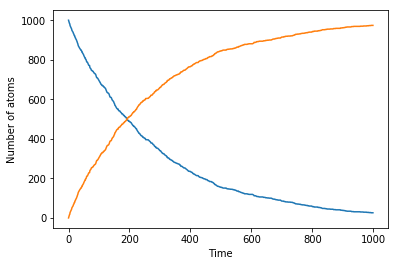

In [23]:
# Here is the code from Example 10.1 of the text

from random import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show, legend

# Constants
NTl = 1000            # Number of thallium atoms
NPb = 0               # Number of lead atoms
tau = 3.053*60        # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 1000           # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h)
Tlpoints = []
Pbpoints = []

# Main loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    # Calculate the number of atoms that decay
    decay = 0
    for i in range(NTl):
        if random()<p:
            decay += 1
    NTl -= decay
    NPb += decay

# Make the graph
plot(tpoints,Tlpoints)
plot(tpoints,Pbpoints)
xlabel("Time")
ylabel("Number of atoms")
show()

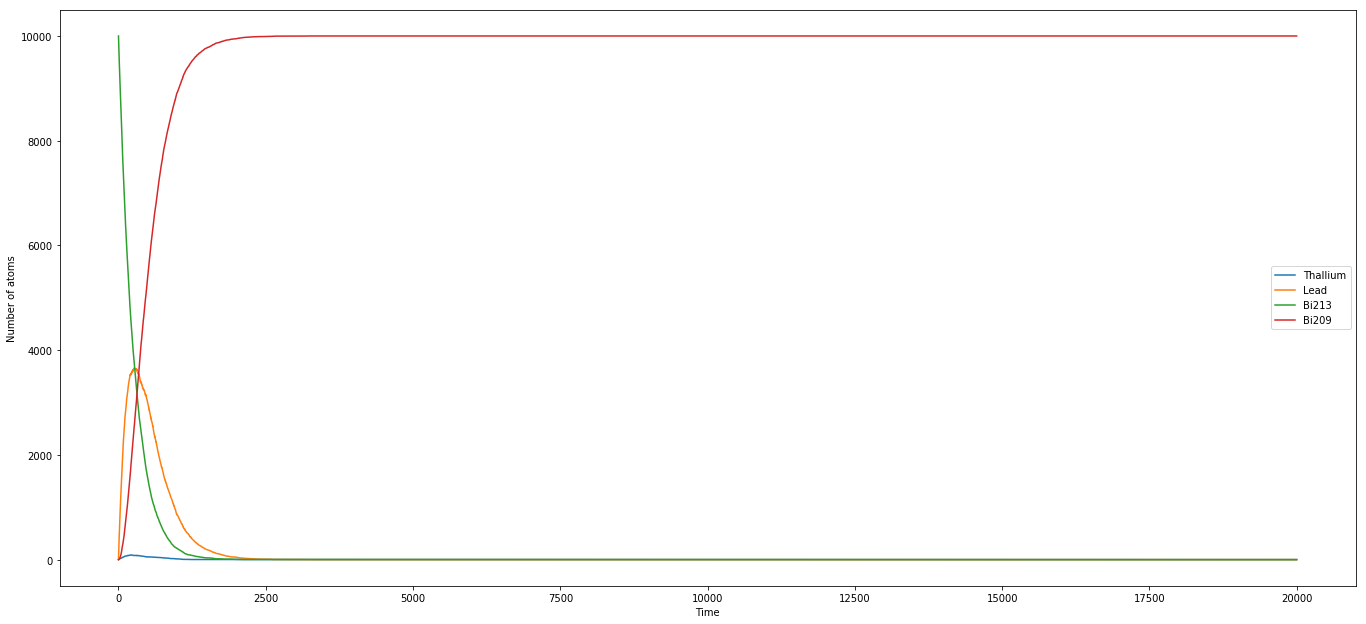

In [29]:
# Initial number of each atom
NBi213 = 10000        # Number of Bi 213 atoms
NPb = 0               # Number of lead atoms
NTl = 0               # Number of thallium atoms
NBi209 = 0            # Number of Bi 209 atoms

# Half lives of each atom
tauTl = 3.053*60        # Half life of thallium in seconds
tauBi = 3.053*60        # Half life of Bi 213 in seconds
tauPb = 3.053*60        # Half life of lead in seconds


# Probabilities of decay
pTl = 1 - 2**(-h/tau)   # Probability of thallium decay in one step
pBi213 = 1 - 2**(-h/tau)   # Probability of Bi 213 decay in one step
pPb = 1 - 2**(-h/tau)   # Probability of lead decay in one step


h = 1.0               # Size of time-step in seconds
tmax = 20000           # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h)
Tlpoints = []
Pbpoints = []
Bi213points = []
Bi209points = []

# Main loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)
    Bi213points.append(NBi213)
    Bi209points.append(NBi209)

    # Calculate the number of lead atoms that decay to Bi209
    decay = 0
    for i in range(NPb):
        if random()<pPb:
            decay += 1
    NPb -= decay
    NBi209 += decay
    
    # Calculate the number of Tl atoms that decay to Pb
    decay = 0
    for i in range(NTl):
        if random()<pTl:
            decay += 1
    NTl -= decay
    NPb += decay
    
    # Calculate the number of Bi213 atoms that decay to Pb and Tl
    decayTl = 0
    decayPb = 0
    for i in range(NBi213):
        if random()<pBi213: # if true, a decay will happen
            #Generate a random number between 0 and 1. If it is greater than 0.9791, the decay will go to Tl
            # otherwise, it will decay to Pb
            
            r = random()
            
            if r > 0.9791:
                decayTl += 1
            else:
                decayPb += 1
    
    # decay is the number of atoms that decay 
    
    NTl += decayTl
    NPb += decayPb
    NBi213 = NBi213 - decayTl - decayPb

# Make the graph
ax = plt.axes([0,0,3,2])
plot(tpoints,Tlpoints)
plot(tpoints,Pbpoints)
plot(tpoints,Bi213points)
plot(tpoints,Bi209points)
xlabel("Time")
ylabel("Number of atoms")
legend(('Thallium', 'Lead', 'Bi213', 'Bi209'),
           loc='center right')
show()



---
# Exercise 3: Radioactive decay, part II
---

Redo the calculation from Example 10.1, but this time using the
faster method described in section 10.1.5.  Using the transformation
method, generate 1000 random numbers from the nonuniform distribution of
Eq. 10.5 to represent the times of decay of 1000 atoms of $^{208}$Tl
(which has half-life 3.053 minutes).  Then make a plot showing the number
of atoms that have not decayed as a function of time, i.e., a plot as a
function of $t$ showing the number of atoms whose chosen decay times are
greater than $t$.

Hint: You may find it useful to know that the package `numpy` contains
a function `sort` that will rearrange the elements of an array
in increasing order.  That is, `b = sort(a)` returns a new
array `b` containing the same numbers as `a`, but rearranged in
order from smallest to largest.


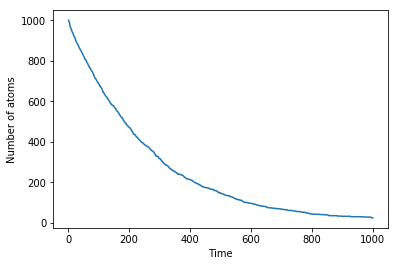

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Half life
tauTi = 3.053*60    

# Generate non-uniform distribution using the transformation method
z = np.random.uniform(0,1,1000)
u = np.log(2)/tauTi
x = (-1/u)*np.log(1-z)

# A list for the number of atoms with decay times greater than t
numAtomList = []
numAtoms = 1000

# Initial time
t = 0

while t < 1000:
    # Count number of atoms with decay time greater than t
    numAtoms = np.sum(np.where(x>t,1,0))
    # Append to list
    numAtomList += [numAtoms]
    t += 1

time = np.arange(1,1001)

# Make the graph
plt.plot(time,numAtomList)
plt.xlabel("Time")
plt.ylabel("Number of atoms")
plt.show()